In [1]:
import torch
import numpy as np
from PIL import Image
import pytorch_lightning as pl
import random
import os
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms
from pathlib import Path

from unet.exam_model import UNet16
from exam_dataset import ImgDataSet

import warnings
warnings.filterwarnings('ignore')

DIR_IMG  = '/home/jovyan/Datasets/crack_segmentation_dataset/images/'
DIR_MASK = '/home/jovyan/Datasets/crack_segmentation_dataset/masks/'
img_names  = [path.name for path in Path(DIR_IMG).glob('*.jpg')]
mask_names = [path.name for path in Path(DIR_MASK).glob('*.jpg')]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


(448, 448)


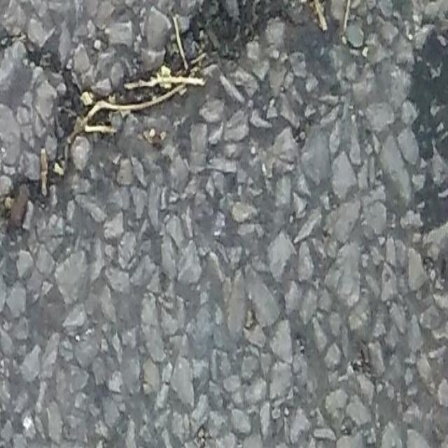

In [15]:

import glob

split = 'train'

path = os.path.join('/home/jovyan/Datasets/', 'crack_segmentation_dataset')
path = os.path.join(path, split, 'images')

img_path = glob.glob(path + '/*.jpg')

image_path = img_path[0]
image = Image.open(image_path)
print(image.size)

image

In [21]:

#
channel_means = [0.485, 0.456, 0.406]
channel_stds  = [0.229, 0.224, 0.225]

#
# channel_means = [0.456, 0.406]
# channel_stds  = [0.224, 0.225]

#
train_tfms = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(channel_means, channel_stds)])
mask_tfms = transforms.Compose([transforms.ToTensor()])

dataset = ImgDataSet(img_transform=train_tfms, mask_transform=mask_tfms)

In [22]:
dataset.__getitem__(0)

(tensor([[[-0.1828, -0.0629,  0.0569,  ...,  0.2796,  0.3481,  0.3309],
          [-0.1657, -0.0287,  0.0741,  ...,  0.2967,  0.3481,  0.3652],
          [-0.1314,  0.0056,  0.1083,  ...,  0.2967,  0.3652,  0.3994],
          ...,
          [ 0.2453, -0.0629, -0.3369,  ...,  0.3481,  0.4679,  0.7248],
          [-0.2684, -0.4568, -0.7137,  ...,  0.3823,  0.4679,  0.7419],
          [-0.7308, -0.7479, -0.9363,  ...,  0.4337,  0.4679,  0.6734]],
 
         [[-0.0574,  0.0651,  0.1877,  ...,  0.4678,  0.5378,  0.5203],
          [-0.0399,  0.1001,  0.2052,  ...,  0.4853,  0.5378,  0.5553],
          [-0.0049,  0.1352,  0.2402,  ...,  0.4678,  0.5553,  0.5903],
          ...,
          [ 0.4678,  0.1527, -0.1275,  ...,  0.4678,  0.5903,  0.8529],
          [-0.0574, -0.2500, -0.5126,  ...,  0.5028,  0.5903,  0.8704],
          [-0.5301, -0.5476, -0.7402,  ...,  0.5553,  0.5903,  0.8004]],
 
         [[ 0.1651,  0.2871,  0.4091,  ...,  0.5659,  0.6356,  0.6182],
          [ 0.1825,  0.3219,

In [2]:
dataset = ImgDataSet(img_transform=transforms.ToTensor(), mask_transform=transforms.ToTensor())
print(len(dataset))
# print((train_data.data/255).mean(axis = (0,1,2)))
# print((train_data.data/255).std(axis = (0,1,2)))

9603


In [3]:
batch_size, num_workers = 16,4
train_size = int(0.8*len(dataset))
valid_size = len(dataset) - train_size
train_dataset, valid_dataset = random_split(dataset, [train_size, valid_size])
train_loader = DataLoader(train_dataset, batch_size, shuffle=False, pin_memory=torch.cuda.is_available(), num_workers=num_workers)
valid_loader = DataLoader(valid_dataset, batch_size, shuffle=False, pin_memory=torch.cuda.is_available(), num_workers=num_workers)


In [4]:

#
lr = 0.001
momentum = 0.9
weight_decay = 1e-4
batch_size = 4
num_workers = 4
epoch = 10 # 50

#
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#
model = UNet16(pretrained=False)

#
optimizer = torch.optim.SGD(model.parameters(), lr,
                                momentum=momentum,
                                weight_decay=weight_decay)

#
criterion = nn.BCEWithLogitsLoss().to('cuda')

torch.Size([16, 3, 448, 448])


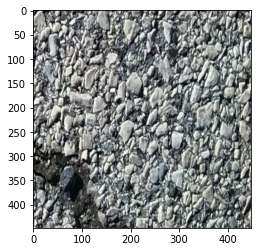

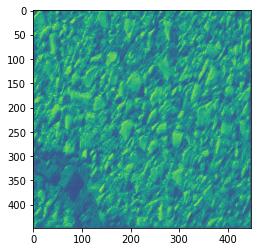

In [6]:

import matplotlib.pyplot as plt
import torch.functional as F
network = UNet16()
for (X_train, y_train) in train_loader:
    print((X_train.shape))
    plt.imshow(X_train[0].permute(1,2,0).numpy())
    plt.show()
    output = model(X_train)
    plt.imshow(output[0].permute(1,2,0).detach().numpy())
    plt.show()
    
    break